In [61]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [62]:
train_csv = pd.read_csv('../mnist/train.csv',header=None)
train_csv.head(2)
test_csv = pd.read_csv('../mnist/t10k.csv',header=None)
test_csv.head(2)

test_csv[0].unique()
len(test_csv[0])

501

In [86]:
test_csv[0]

0      7
1      2
2      1
3      0
4      4
      ..
496    9
497    4
498    0
499    6
500    3
Name: 0, Length: 501, dtype: int64

손글씨 인공 신경망

In [64]:
# 데이터 전처리하기
train_input = train_csv.iloc[:,1:].to_numpy()
train_target = train_csv[0].to_numpy()

test_input = test_csv.iloc[:,1:].to_numpy()
test_target = test_csv[0].to_numpy()

In [65]:
# 표준화 작업
train_scaled = train_input.reshape(-1,28,28,1)/255.0
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [66]:
train_scaled.shape

(1001, 28, 28, 1)

In [67]:
# train 세트 내에서 val 검증세트 만들기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

1차 합성곱층 생성

In [68]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',\
    input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 신경망

In [69]:
# 2차 합성곱 신경망
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [70]:
model.add(keras.layers.Flatten()) # 1차원 행렬로 변경
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('write_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled,train_target,batch_size=32, epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2760 - loss: 2.1254 - val_accuracy: 0.7861 - val_loss: 0.9849
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6798 - loss: 1.0367 - val_accuracy: 0.8657 - val_loss: 0.5558
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8024 - loss: 0.6766 - val_accuracy: 0.8806 - val_loss: 0.3864
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8763 - loss: 0.4250 - val_accuracy: 0.8955 - val_loss: 0.3489
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8880 - loss: 0.3626 - val_accuracy: 0.9204 - val_loss: 0.2832
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9002 - loss: 0.3088 - val_accuracy: 0.9254 - val_loss: 0.2795
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9572 - loss: 0.1760 - val_accuracy: 0.9303 - val_loss: 0.2371
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9556 - loss: 0.1832 - val_accuracy: 0.9254 - v

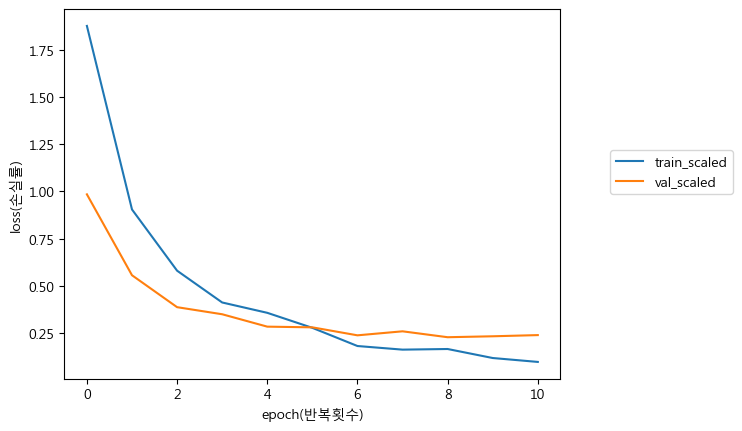

In [73]:
plt.plot(history.history['loss'],label='train_scaled')
plt.plot(history.history['val_loss'],label='val_scaled')
plt.xlabel('epoch(반복횟수)')
plt.ylabel('loss(손실률)')
plt.legend(loc=(1.1,0.5))
plt.show()

In [74]:
model.evaluate(val_scaled,val_target)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9370 - loss: 0.1958 


[0.22709691524505615, 0.9353233575820923]

In [94]:
# 예측하기
predict = model.predict(test_scaled[0:1])
print("test_set 예측 손글씨 : ",predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
test_set 예측 손글씨 :  [[8.4034127e-08 5.9119870e-08 6.3402024e-07 1.3672313e-06 3.7193792e-09
  1.1093982e-08 3.1764209e-11 9.9999511e-01 7.7892236e-07 1.9361721e-06]]


In [98]:
predict[0]

array([8.4034127e-08, 5.9119870e-08, 6.3402024e-07, 1.3672313e-06,
       3.7193792e-09, 1.1093982e-08, 3.1764209e-11, 9.9999511e-01,
       7.7892236e-07, 1.9361721e-06], dtype=float32)

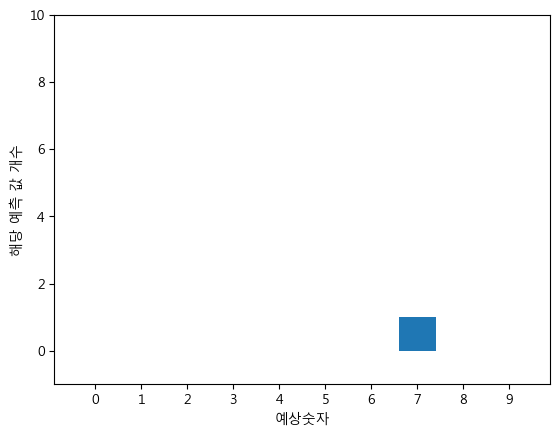

In [99]:
plt.bar(range(10),predict[0])
plt.xlabel('예상숫자')
plt.ylabel('해당 예측 값 개수')
plt.ylim(-1,10)
plt.xticks([i for i in range(10)])
plt.show()


In [100]:
# classes = ['0','1','2','3','4','5','6','7','8','9']
classes = [i for i in range(10)]

In [101]:
# np.argmax 최대값의 index 값 리턴
print(classes[np.argmax(predict)])

7


In [ ]:
# test 세트 검증 - 3차원 행렬로 변경 후 진행
model.evaluate(test_scaled,test_target)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9567 - loss: 0.1438


[0.2065233290195465, 0.9421157836914062]